In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# 1. Data Loading and Data Understanding

In [3]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
print(df.shape)

(48895, 16)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 2. Data Cleaning

1. Handling missing values or NA

In [7]:
# Remove Rows with Missing Values: df.dropna
# Remove Columns with Missing Values: df.dropna(axis=1)
# Impute missing values
#     with a constant - df.fillna(0, inplace=True)
#     with mean (if there are no outliers)
#     with median (if there are outliers)
#     with mode (for categorical data)
# Conditional Imputation - Apply inputation only for specific groups in a column
# Forward or backward filling - propagate the last or next valid observation forward
# Interpolate Missing Values - Used for continous or timeseries data (Linear method)

In [8]:
print("Missing values for each column")
df.isnull().sum()

Missing values for each column


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
#Fill name and host_id with constant value - noname
df['name'].fillna("noname", inplace=True)
df['host_name'].fillna("noname", inplace=True)

In [12]:
# Drop rows with any missing values
# df.dropna(axis=0, inplace=True)
# Drop columns with any missing values
# df.dropna(axis=1, inplace=True)
# axis=0: Operations apply along the rows (row drop, row add)
# axis=1: Operations apply along the columns (col drop, col add)

2. Remove duplicates

In [13]:
print("Duplicate values for each column")
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

Duplicate values for each column


0

3. String Operations and manipulation #df.str.split(), df.str.contains(), df.str.replace()
4. Column Rename #df.rename()
5. Type Conversion

In [14]:
# Convert last_review type from object to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
print(df['last_review'].dtype)

datetime64[ns]


# 3. Exploratory Data Analysis (EDA)

1. Explore Caterogical Columns

In [15]:
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()
print(neighbourhood_group_counts, "\n")

room_type_counts = df['room_type'].value_counts()
print(room_type_counts)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64 

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


2. Row Selections 

In [16]:
# Get all rows where price > 10000
max_price = df['price'].max()
df.loc[df['price'] >= max_price]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaT,NaN,1,83


In [17]:
# Get all rows where price > 10000 AND neighbourhood in Queens
df.loc[(df['price'] >= max_price) & (df['neighbourhood_group'] == 'Queens')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.7681,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0


3. Filtering the rows

In [18]:
# Get all rows where the room_type is 'Entire home/apt' and price is less than 150
df_entire_home = df[(df['room_type'] == 'Entire home/apt') & (df['price'] < 10)]
df_entire_home

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaT,NaN,1,0


4. Groups and Aggregations

In [19]:
# Get mean price of each neighbourhood_group - one col grouping 

df_neighbourhood_group_price = df.groupby(['neighbourhood_group']).agg({
    'price': ['mean', 'min', 'max']})
df_neighbourhood_group_price

price           
                           mean min    max
neighbourhood_group                       
Bronx                 87.496792   0   2500
Brooklyn             124.383207   0  10000
Manhattan            196.875814   0  10000
Queens                99.517649  10  10000
Staten Island        114.812332  13   5000

In [20]:
# Get mean price of each neighbourhood_group and room type - two col grouping
df_ng_rt_price = df.groupby(['neighbourhood_group', 'room_type']).agg(
    {'price': 'mean'})
print(df_ng_rt_price)

                                          price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099
                    Shared room       50.527845
Manhattan           Entire home/apt  249.239109
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444


In [21]:
# Get mean price, sum of reviews for neighbourhood_group, room_type - two col grouping and two col aggregation
df_ng_rt_price_reviews = df.groupby(['neighbourhood_group', 'room_type']).agg({
    'price': 'mean', 
    'number_of_reviews': 'sum'})
print(df_ng_rt_price_reviews)

                                          price  number_of_reviews
neighbourhood_group room_type                                     
Bronx               Entire home/apt  127.506596              11627
                    Private room      66.788344              16312
                    Shared room       59.800000                432
Brooklyn            Entire home/apt  178.327545             267128
                    Private room      76.500099             213653
                    Shared room       50.527845               5793
Manhattan           Entire home/apt  249.239109             235147
                    Private room     116.776622             209150
                    Shared room       88.977083              10272
Queens              Entire home/apt  147.050573              60644
                    Private room      71.762456              93561
                    Shared room       69.020202               2745
Staten Island       Entire home/apt  173.846591               

5. Correlation and Covariance

In [22]:
# Covariance measures direction in which two variables change together.
# Covariance of Price and minimum_nights
covariance_price_nights = df[['price', 'minimum_nights']].cov()
covariance_price_nights

# A positive covariance indicates that the variables increase together, 
# A negative covariance indicates that as one increases, the other decreases.

,price,minimum_nights
price,57674.025247,210.816423
minimum_nights,210.816423,420.682642


In [23]:
# Correlation measures the strength and direction of a linear relationship
# Correlation between price and minimum_nights
correlation = df[['price', 'minimum_nights']].corr()
correlation

,price,minimum_nights
price,1.000000,0.042799
minimum_nights,0.042799,1.000000


In [24]:
print("correlation suggests that price and minimum nights are directly related")
print("covariance suggest that thought they are directly related, the strength is very weak")
print("Hence price and min nights have weak positive linear relationship")

correlation suggests that price and minimum nights are directly related
covariance suggest that thought they are directly related, the strength is very weak
Hence price and min nights have weak positive linear relationship


6. Detecting Outliers

a. Z Scores

In [25]:
df_z = pd.DataFrame(columns=['price_z','reviews_z','price','reviews'])
df_z['price_z'] = stats.zscore(df['price'])
df_z['reviews_z'] = stats.zscore(df['number_of_reviews'])
df_z['price'] = df['price']
df_z['reviews'] = df['number_of_reviews']
df_z.head()

,price_z,reviews_z,price,reviews
0,-0.015493,-0.320414,149,9
1,0.300974,0.487665,225,45
2,-0.011329,-0.522433,150,0
3,-0.265335,5.538156,89,270
4,-0.302811,-0.320414,80,9


In [26]:
outliers_z_price = df_z[(df_z['price_z'] > 3) | (df_z['price_z'] < -3)]
outliers_z_reviews = df_z[(df_z['reviews_z'] > 3) | (df_z['reviews_z'] < -3)]

sorted_outliers_z_price = outliers_z_price.sort_values(by='price_z', ascending=False)
print("Top 3 outliers for price \n", sorted_outliers_z_price.head(3))
print("Bottom 3 outliers for price \n", sorted_outliers_z_price.tail(3))

Top 3 outliers for price 
         price_z  reviews_z  price  reviews
29238  41.00441  -0.522433  10000        0
9151   41.00441  -0.477540  10000        2
17692  41.00441  -0.410200  10000        5
Bottom 3 outliers for price 
         price_z  reviews_z  price  reviews
2040   3.070056   0.061179    890       26
8805   3.061728   0.420325    888       42
44476  3.007596  -0.522433    875        0


In [27]:
sorted_outliers_z_reviews = outliers_z_reviews.sort_values(by='reviews_z', ascending=False)
print("Top 3 outliers for reviews \n", sorted_outliers_z_reviews.head(3))
print("Bottom 3 outliers for reviews \n", sorted_outliers_z_reviews.tail(3))

Top 3 outliers for reviews 
         price_z  reviews_z  price  reviews
11759 -0.440225  13.596494     47      629
2031  -0.431897  13.102668     49      607
2030  -0.431897  12.878202     49      597
Bottom 3 outliers for reviews 
         price_z  reviews_z  price  reviews
3974   0.092772   3.001687    175      157
7688  -0.365272   3.001687     65      157
17571 -0.452717   3.001687     44      157


In [28]:
print("For both price and reviews, the outliers seem to be only on right side as the min Z score is + 3 for both of them")

For both price and reviews, the outliers seem to be only on right side as the min Z score is + 3 for both of them


b. Boxplots

In [29]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_reviews = df['number_of_reviews'].quantile(0.25)
Q3_reviews = df['number_of_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews


outliers_iqr_price = df[(df['price'] < (Q1_price - 1.5 * IQR_price)) | (df['price'] > (Q3_price + 1.5 * IQR_price))]
outliers_iqr_reviews = df[(df['number_of_reviews'] < (Q1_reviews - 1.5 * IQR_reviews)) | (df['number_of_reviews'] > (Q3_reviews + 1.5 * IQR_reviews))]

print("Outliers in 'Price' based on IQR:\n", outliers_iqr_price[['price']].sort_values(by='price', ascending=False))
print("Outliers in 'Number of Reviews' based on IQR:\n", outliers_iqr_reviews[['number_of_reviews']].sort_values(by='number_of_reviews', ascending=False))


Outliers in 'Price' based on IQR:
        price
9151   10000
17692  10000
29238  10000
6530    9999
12342   9999
...      ...
44761    335
10398    335
30330    335
19462    335
35414    335

[2972 rows x 1 columns]
Outliers in 'Number of Reviews' based on IQR:
        number_of_reviews
11759                629
2031                 607
2030                 597
2015                 594
13495                576
...                  ...
32093                 59
26239                 59
22745                 59
7269                  59
670                   59

[6021 rows x 1 columns]


c. Visualize Box Plots

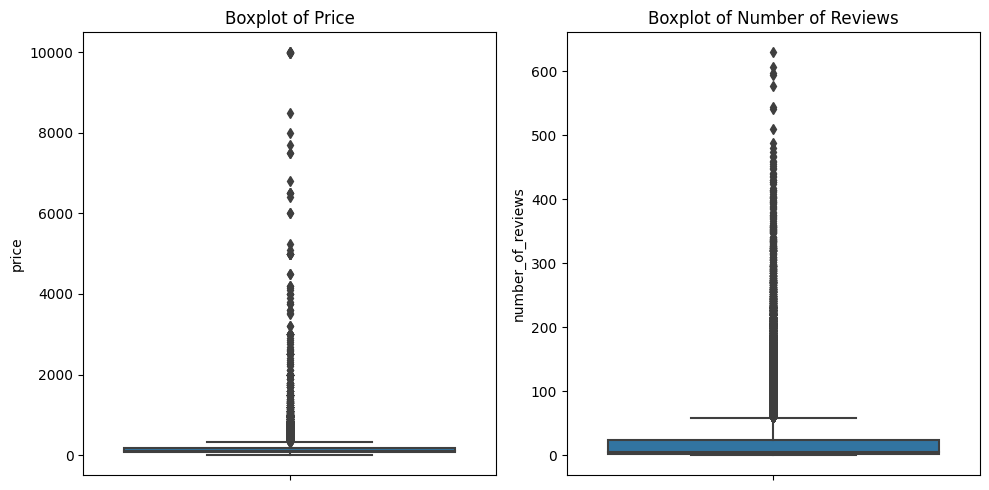

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title("Boxplot of Price")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['number_of_reviews'])
plt.title("Boxplot of Number of Reviews")

plt.tight_layout()
plt.show()

In [31]:
#Other method - Extreme Outliers or Tukey's fences
# Q1 - 1.5 * IQR
# Q3 + 1.5 * IQR

d. Visualize Scatter Plots

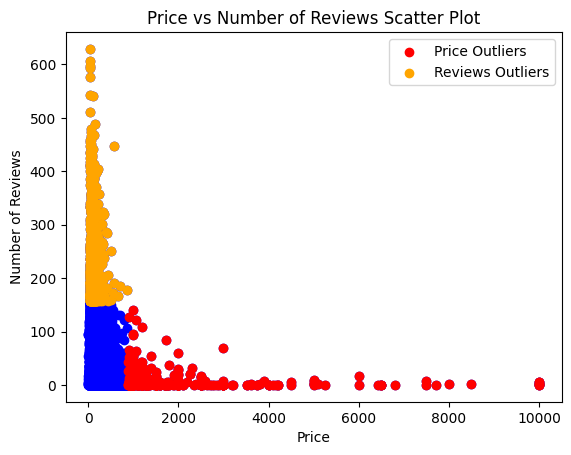

In [32]:
plt.scatter(df['price'], df['number_of_reviews'], c='blue')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs Number of Reviews Scatter Plot')

# Highlight outliers in red
plt.scatter(outliers_z_price['price'], outliers_z_price['reviews'], c='red', label='Price Outliers')
# Highlight outliers in orange
plt.scatter(outliers_z_reviews['price'], outliers_z_reviews['reviews'], c='orange', label='Reviews Outliers')

plt.legend()
plt.show()

7. Univariant, Bivariant and Multivariant Analysis

a. Univariate Analysis - focuses on examining one variable at a time

<Axes: xlabel='neighbourhood_group'>

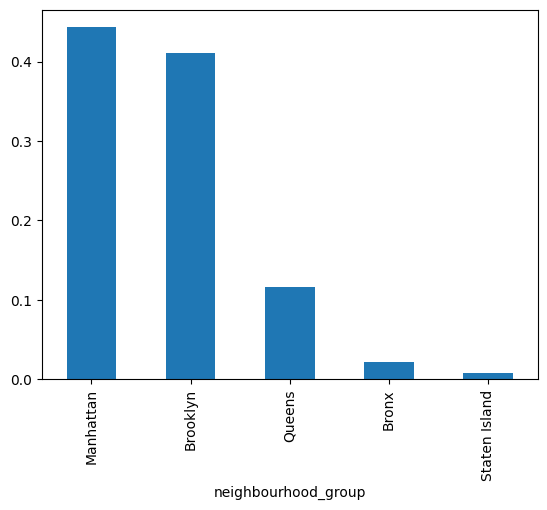

In [35]:
# Bar plot for neighbourhood_group percentage
(df['neighbourhood_group'].value_counts()/ len(df)).plot.bar()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


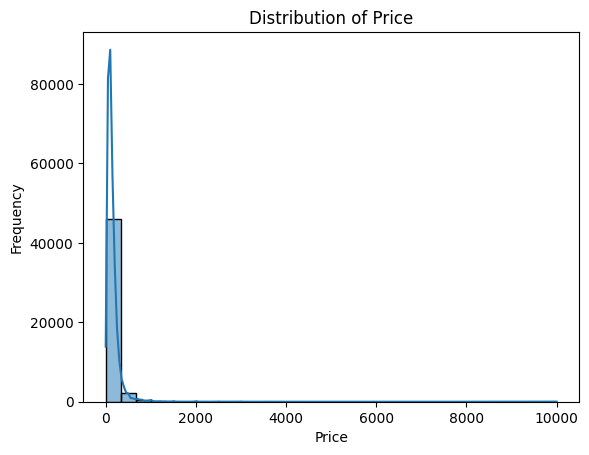

In [36]:
# Distribution of Price
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

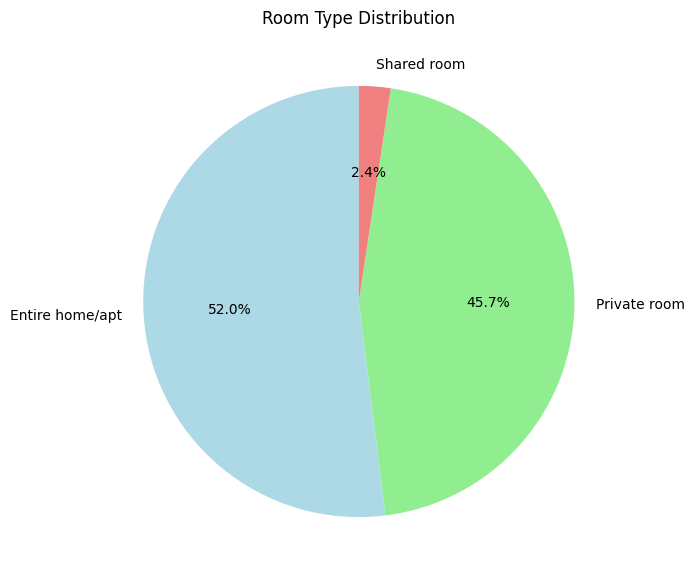

In [37]:
# Pie Plot for room_type
room_type_counts = df['room_type'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Room Type Distribution')
plt.show()

b. Bivariant Analysis - analysis looks at the relationship between two variables


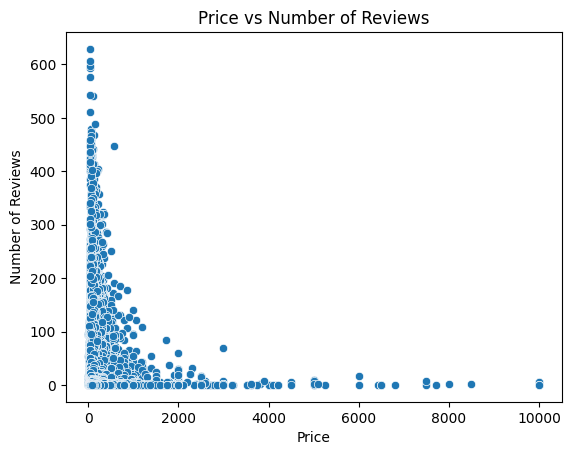

The higher the price, less are the reviews


In [38]:
# Scatter plots: Numerical v/s Numberical Data

# Price vs. Number of Reviews 
sns.scatterplot(x=df['price'], y=df['number_of_reviews'])
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()
print("The higher the price, less are the reviews")

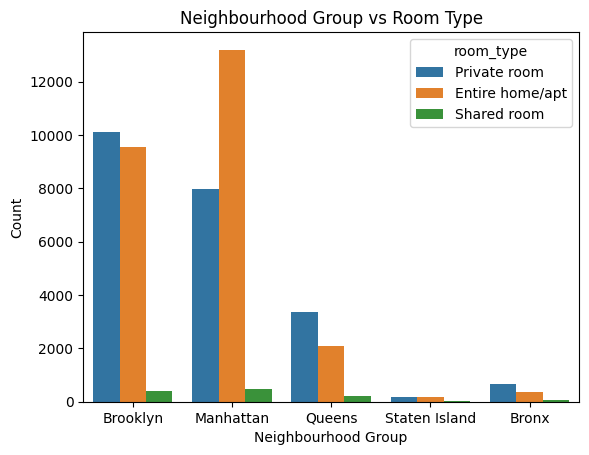

In [39]:
# Distribution or count plots: Categorical v/s Categorical Data

# Neighbourhood Group vs Room Type
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.title('Neighbourhood Group vs Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

c. Multivariate analysis - examines more than two variables simultaneously

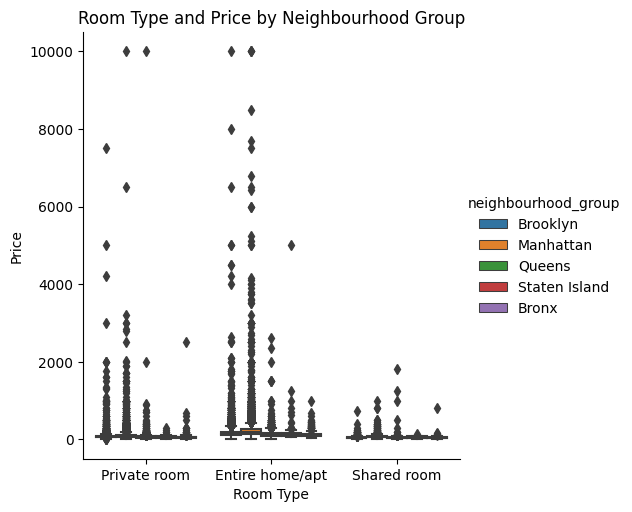

In [40]:
# Two categorical and one numerical

# Price, Room Type, and Neighbourhood Group
sns.catplot(x="room_type", y="price", hue="neighbourhood_group", data=df, kind="box")
plt.title('Room Type and Price by Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

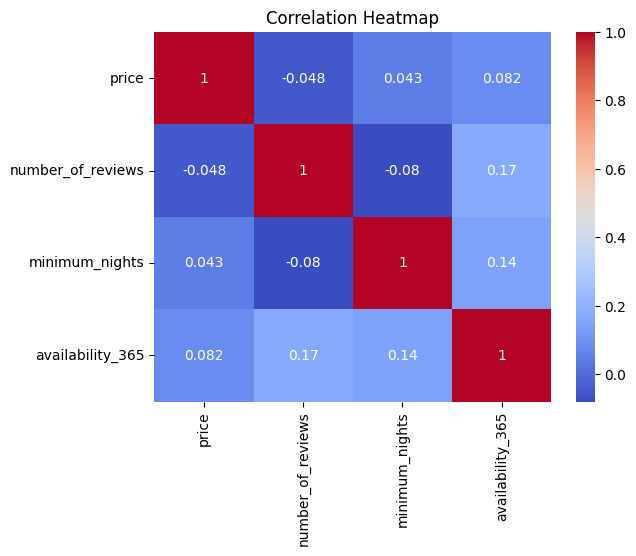

In [41]:
# Heatmap to show correlation among numeric variables

corr = df[['price', 'number_of_reviews', 'minimum_nights', 'availability_365']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

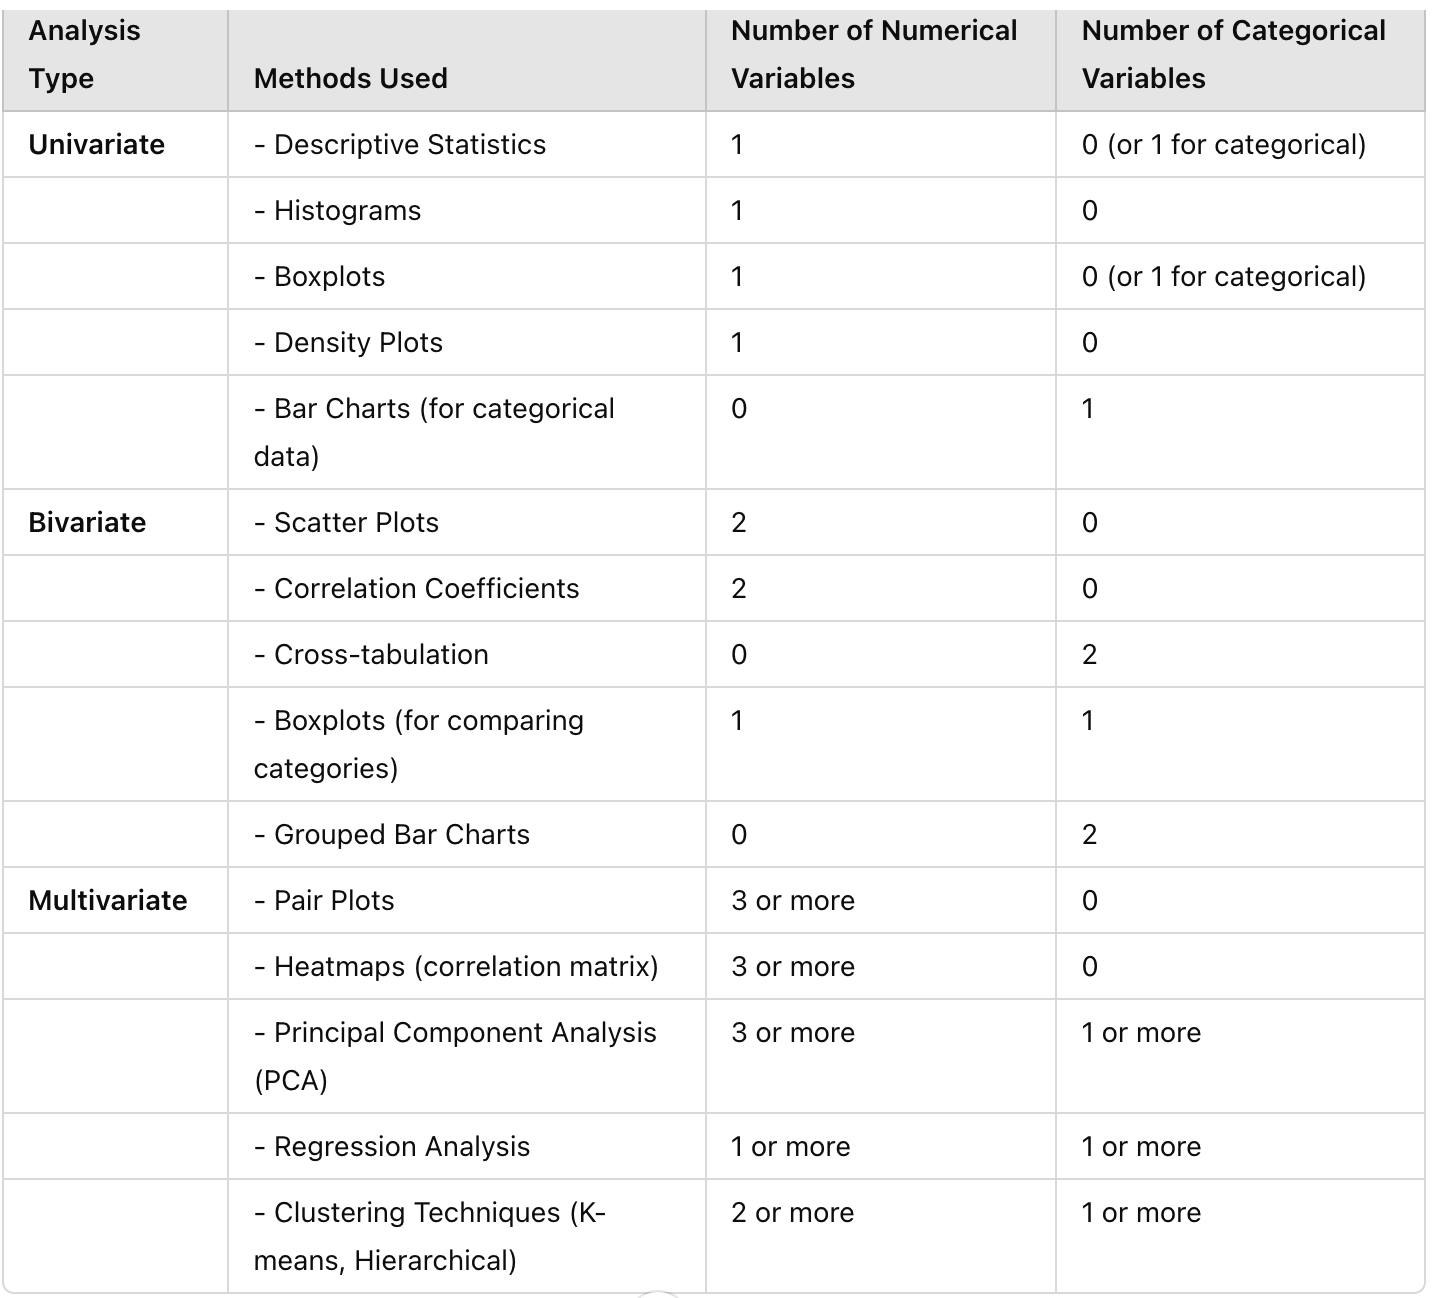

# 4. Data Preprocessing 

1. Scaling - Scaling ensures features contribute equally to the machine learning model when these features have different range - Numerical Data
*     Min Max
*     Z Scores
*     Max Abs
*     Robust
*     Quantile
*     Power

In [42]:
# Min-Max Scaling -> (X-Xmin)/(Xmax-Xmin) - scales the values to a fixed range, typically [0, 1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
min_max_scale = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])
df_min_max_scale = pd.DataFrame(min_max_scale, columns=['price', 'number_of_reviews', 'minimum_nights'])
df_min_max_scale.head(3)

,price,number_of_reviews,minimum_nights
0,0.0149,0.014308,0.000000
1,0.0225,0.071542,0.000000
2,0.0150,0.000000,0.001601


In [43]:
df_min_max_scale.describe()
# Values range from 0 to 1

,price,number_of_reviews,minimum_nights
count,48895.000000,48895.000000,48895.000000
mean,0.015272,0.037002,0.004828
std,0.024015,0.070828,0.016422
min,0.000000,0.000000,0.000000
25%,0.006900,0.001590,0.000000
50%,0.010600,0.007949,0.001601
75%,0.017500,0.038156,0.003203
max,1.000000,1.000000,1.000000


In [44]:
# Min-Max can be customized from (-1 to 1) using (2*(X-Xmin)/(Xmax-Xmin)) - 1

In [45]:
# Z-Score Scaling (Standardization) -> (x - mean)/sd - mean = 0 standard deviation = 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
z_scale = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])
df_z_scale = pd.DataFrame(z_scale, columns=['price', 'number_of_reviews', 'minimum_nights'])
df_z_scale.head(3)

,price,number_of_reviews,minimum_nights
0,-0.015493,-0.320414,-0.293996
1,0.300974,0.487665,-0.293996
2,-0.011329,-0.522433,-0.196484


In [46]:
df_z_scale.describe()

,price,number_of_reviews,minimum_nights
count,4.889500e+04,4.889500e+04,4.889500e+04
mean,3.720195e-17,1.860098e-17,1.104433e-17
std,1.000010e+00,1.000010e+00,1.000010e+00
min,-6.359342e-01,-5.224332e-01,-2.939962e-01
25%,-3.486158e-01,-4.999866e-01,-2.939962e-01
50%,-1.945465e-01,-4.102001e-01,-1.964844e-01
75%,9.277183e-02,1.628580e-02,-9.897262e-02
max,4.100441e+01,1.359649e+01,6.060212e+01


In [47]:
# MaxAbs Scaling -> (x/|xmax|) - Ranges from [-1, 1] - Used for negative features

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
max_abs = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])
df_max_abs = pd.DataFrame(max_abs, columns=['price', 'number_of_reviews', 'minimum_nights'])
df_max_abs.describe()

,price,number_of_reviews,minimum_nights
count,48895.000000,48895.000000,48895.000000
mean,0.015272,0.037002,0.005624
std,0.024015,0.070828,0.016408
min,0.000000,0.000000,0.000800
25%,0.006900,0.001590,0.000800
50%,0.010600,0.007949,0.002400
75%,0.017500,0.038156,0.004000
max,1.000000,1.000000,1.000000


In [48]:
# Robust Scaling -> (x-median)/IQR - Unbounded Range 
# Centres data around the median and scales according to the interquartile range 
# Less sensitive to extreme values

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])
df_robust = pd.DataFrame(robust, columns=['price', 'number_of_reviews', 'minimum_nights'])
df_robust.describe()

,price,number_of_reviews,minimum_nights
count,48895.000000,48895.000000,48895.000000
mean,0.440761,0.794542,1.007491
std,2.265605,1.936982,5.127637
min,-1.000000,-0.217391,-0.500000
25%,-0.349057,-0.173913,-0.500000
50%,0.000000,0.000000,0.000000
75%,0.650943,0.826087,0.500000
max,93.339623,27.130435,311.750000


In [49]:
# Quantile Transformation -> (Quantile of X) - when we want data to follow a uniform distribution
# Used for highly skewed data

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
quantile = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])
df_quantile = pd.DataFrame(quantile, columns=['price', 'number_of_reviews', 'minimum_nights'])
df_quantile.describe()

,price,number_of_reviews,minimum_nights
count,48895.000000,48895.000000,48895.000000
mean,-0.011134,-0.777869,-1.031027
std,1.011726,2.348190,2.544647
min,-5.199338,-5.199338,-5.199338
25%,-0.702315,-0.644086,-5.199338
50%,-0.003764,-0.003764,0.199538
75%,0.654930,0.687939,0.707140
max,5.199338,5.199338,5.199338


In [50]:
# Power Transformation -> log(x) - Two common power transformations
# Yeo-Johnson (works with positive and negative values) and Box-Cox (only positive values)

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
power = scaler.fit_transform(df[['price', 'number_of_reviews', 'minimum_nights']])
df_power = pd.DataFrame(power, columns=['price', 'number_of_reviews', 'minimum_nights'])
df_power.describe()

,price,number_of_reviews,minimum_nights
count,4.889500e+04,4.889500e+04,4.889500e+04
mean,-2.573910e-15,-1.674088e-16,-4.882756e-17
std,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.051263e+01,-1.382666e+00,-1.288079e+00
25%,-6.856593e-01,-8.183208e-01,-1.288079e+00
50%,-3.587220e-02,-2.553361e-02,1.734294e-01
75%,6.695829e-01,8.430904e-01,7.216861e-01
max,4.658951e+00,2.285774e+00,2.144946e+00


In [51]:
# Min-Max Scaling: Default is [0, 1] (or customized to [-1, 1])
#   Use when the features are bounded or need to be on the same scale for algorithms like KNN, neural networks, or when working with image data.
# Standardization (Z-score Scaling): No fixed range, typically [-3, 3]. mean = 0, sd = 1
#   Use for algorithms that assume normality or are sensitive to the distribution of data, like logistic regression, SVM, and PCA.
# MaxAbs Scaling: [-1 to 1]
#   Use when your data contains both positive and negative values, and you want to preserve the sign while scaling.
# Robust Scaling: Unbounded
#   Use when your dataset contains outliers and you don’t want them to skew the results.
# Quantile Transformation: [0,1] or custom range
#   Use when you need to transform the distribution of the data to a uniform or Gaussian distribution, especially for skewed data.
# Power Transformation: Generally unbounded (aims for normality)
#   Use when you need to make the data more Gaussian and stabilize variance.


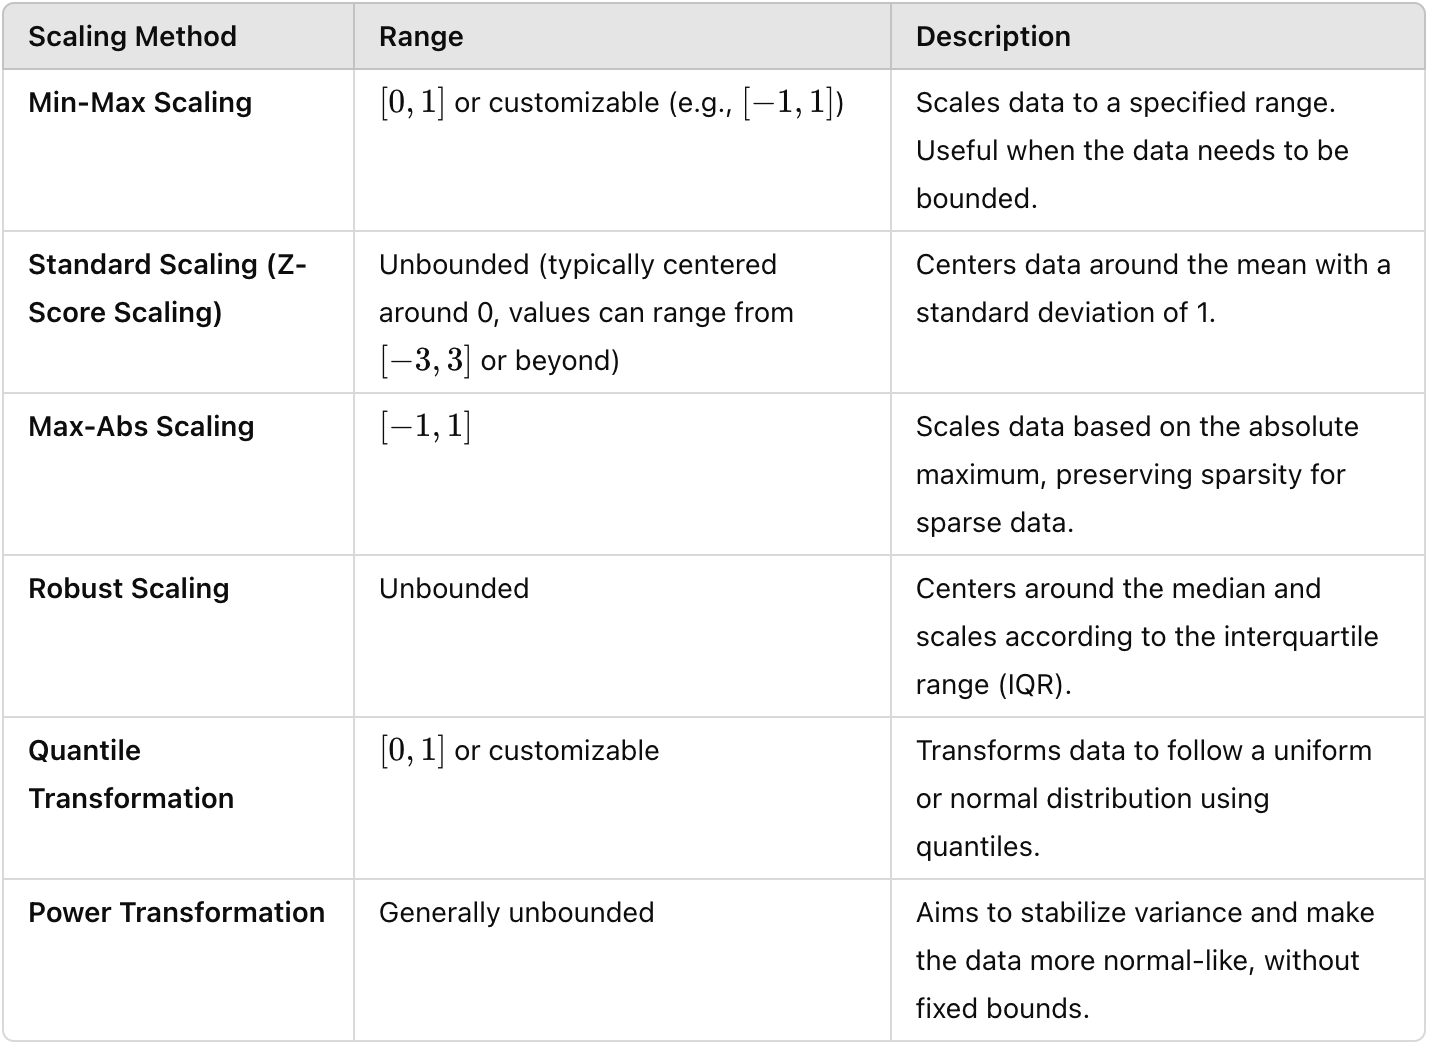

2. Encoding - Preprocesses categorical data
* Lable
* One Hot
* Binary 
* Target
* Frequency 
* Ordinal

In [52]:
# Label Encoding - Converts each category into a unique integer (Ordinal)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoding = pd.DataFrame()
df_encoding['neighbourhood_group_encoded'] = le.fit_transform(df['neighbourhood_group'])
df_encoding['room_type_encoded'] = le.fit_transform(df['room_type'])

df_encoding.head(3)

,neighbourhood_group_encoded,room_type_encoded
0,1,1
1,2,0
2,2,1


In [53]:
# One Hot Encoding - Converts each category into a binary column (0 or 1) (Nominal)

one_hot_encoded_df = pd.get_dummies(df[['neighbourhood_group']], columns=['neighbourhood_group'])
one_hot_encoded_df.head(3)

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,True,False,False


In [54]:
# Binary Encoding - Combines features of both label and one-hot encoding

import category_encoders as ce

df_temp = df[['neighbourhood_group']]
encoder = ce.BinaryEncoder(cols=['neighbourhood_group'])
binary_encoded_df = encoder.fit_transform(df_temp)
binary_encoded_df.head(3)

,neighbourhood_group_0,neighbourhood_group_1,neighbourhood_group_2
0,0,0,1
1,0,1,0
2,0,1,0


In [55]:
# Target Encoding - Replaces each category with the mean of the target variable
# Useful when there is a strong correlation between the categorical and the target variable

df_temp = df[['neighbourhood_group', 'price']].copy()
target_mean = df_temp.groupby('neighbourhood_group')['price'].mean()
df_temp['neighbourhood_group_encoded'] = df_temp['neighbourhood_group'].map(target_mean)
df_temp.head(3)

,neighbourhood_group,price,neighbourhood_group_encoded
0,Brooklyn,149,124.383207
1,Manhattan,225,196.875814
2,Manhattan,150,196.875814


In [56]:
# Frequency Encoding - Replaces categories with their frequency count in the dataset - nominal

df_temp = df[['neighbourhood_group']].copy()
frequency_encoded = df_temp['neighbourhood_group'].value_counts().to_dict()
df_temp['neighbourhood_group_encoded'] = df_temp['neighbourhood_group'].map(frequency_encoded)
df_temp.head(3)

,neighbourhood_group,neighbourhood_group_encoded
0,Brooklyn,20104
1,Manhattan,21661
2,Manhattan,21661


In [57]:
# Ordinal Encoding - Assigns an integer to each category based on its order

from sklearn.preprocessing import OrdinalEncoder
df_temp = df[['neighbourhood_group']].copy()
ordinal_encoder = OrdinalEncoder(categories=[['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island']])
df_temp['neighbourhood_group_encoded'] = ordinal_encoder.fit_transform(df_temp[['neighbourhood_group']])
df_temp.head(3)

,neighbourhood_group,neighbourhood_group_encoded
0,Brooklyn,0.0
1,Manhattan,1.0
2,Manhattan,1.0


In [58]:
# One-Hot Encoding: This technique does not impose any order among categories, which is crucial for nominal data
# Label Encoding: It assigns integer values to categories, which suggest an order
# Binary Encoding: It is more efficient in terms of memory compared to one-hot encoding, especially when dealing with many unique categories
# Instead of creating multiple binary columns like one-hot encoding, it uses fewer columns by converting the integer representation of categories into binary form

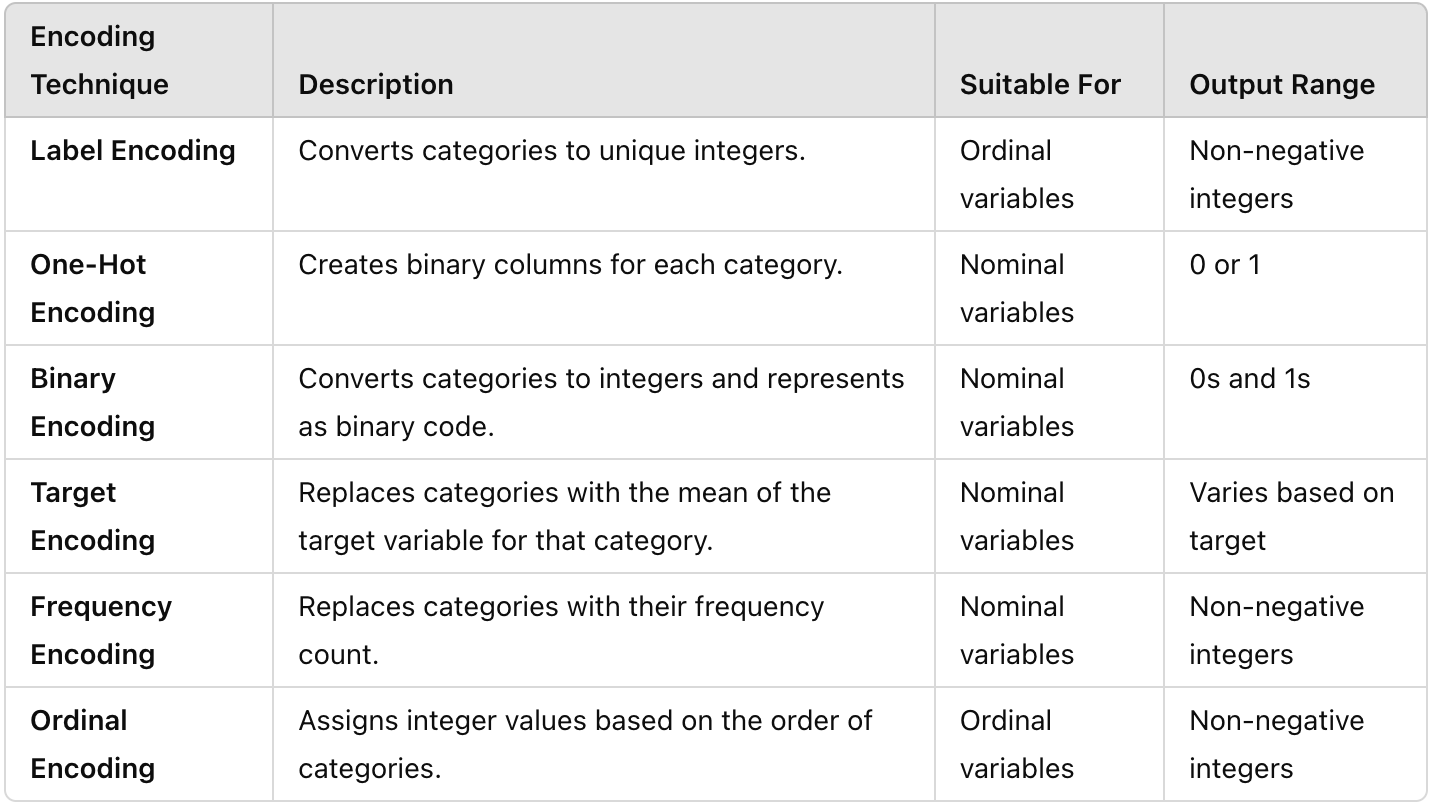

3. Handling or Removing Outliers
* Using IQR
* Using Z Scores
* Winsorizing
* Log Tranformation
* Capping

In [59]:
# Removing Outliers Using IQR -  Filter out data points outside of the IQR range

Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_without_outliers = df[(df['number_of_reviews'] >= lower_bound) & (df['number_of_reviews'] <= upper_bound)]
df_without_outliers.shape

(42874, 16)

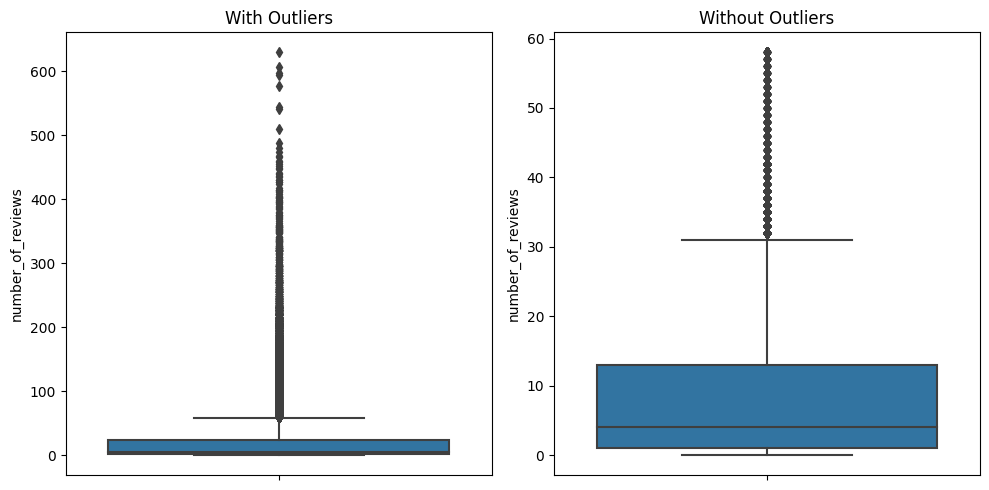

In [60]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['number_of_reviews'])
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_without_outliers['number_of_reviews'])
plt.title("Without Outliers")

plt.tight_layout()
plt.show()

In [61]:
# Removing Outliers Using Z-Score - Filter out data points > 3 and < -3

df_temp = df
df_temp['z_score_price'] = stats.zscore(df_temp['price'])
df_no_outliers_z = df_temp[(df_temp['z_score_price'].abs() < 3)]
df_no_outliers_z.shape


(48507, 17)

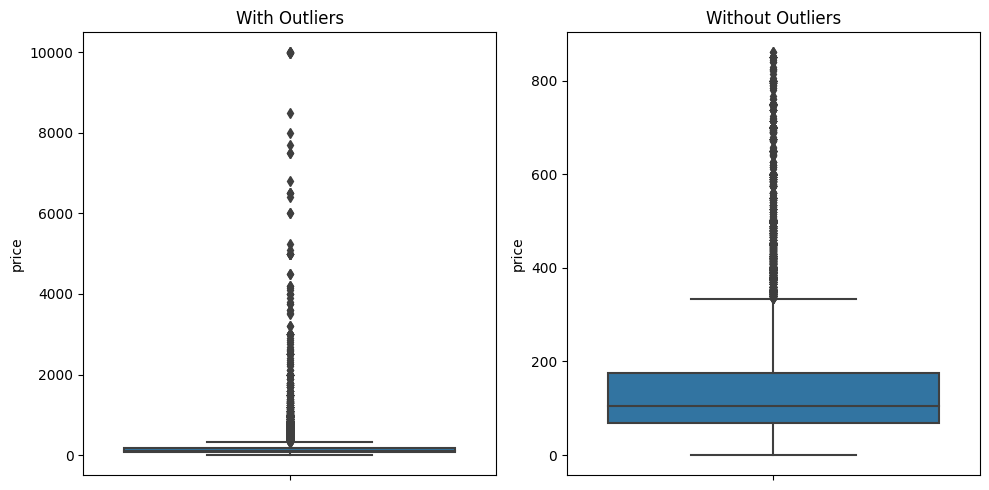

In [62]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_no_outliers_z['price'])
plt.title("Without Outliers")

plt.tight_layout()
plt.show()

In [63]:
# Winsorizing - Replace outliers with the nearest valid value (5th & 95th Percentile)

lower_percentile = df['number_of_reviews'].quantile(0.05)
upper_percentile = df['number_of_reviews'].quantile(0.95)

df_winsorized = df.copy()
df_winsorized['number_of_reviews'] = df_winsorized['number_of_reviews'].clip(lower=lower_percentile, upper=upper_percentile)


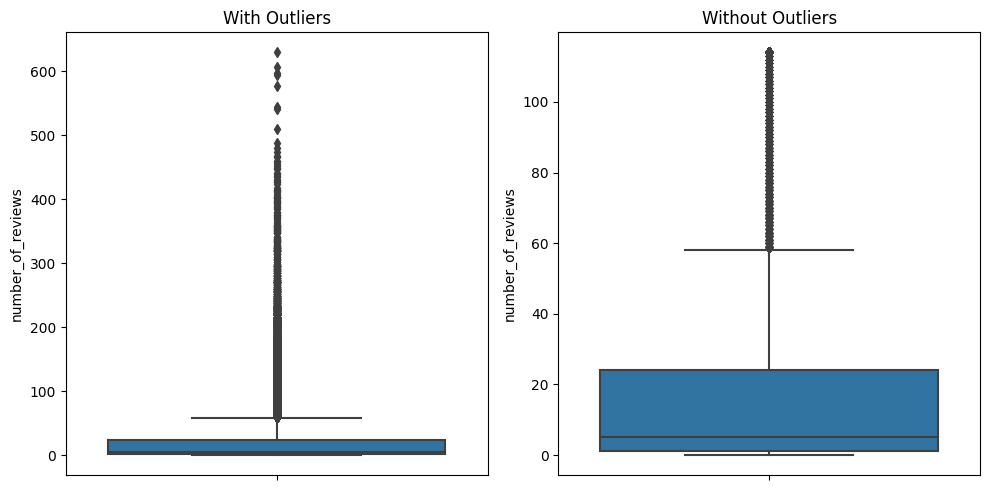

In [64]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['number_of_reviews'])
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_winsorized['number_of_reviews'])
plt.title("Without Outliers")

plt.tight_layout()
plt.show()

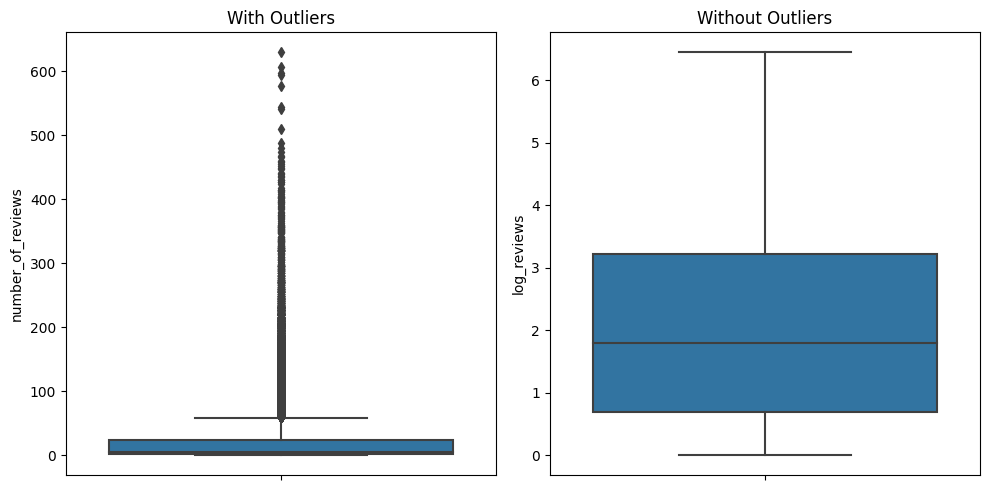

In [65]:
# Log Transformations - to reduce the impact of outliers, especially when they are high values.

df_temp['log_reviews'] = np.log1p(df_temp['number_of_reviews']) 

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_temp['number_of_reviews'])
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_temp['log_reviews'])
plt.title("Without Outliers")

plt.tight_layout()
plt.show()

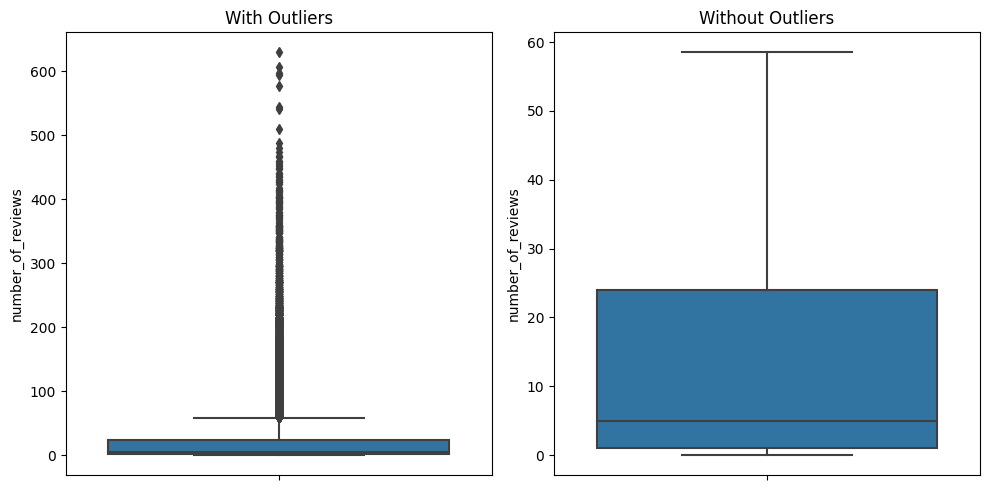

In [66]:
# Capping - Set a maximum and minimum threshold for the data

df_capped = df.copy()
df_capped['number_of_reviews'] = np.where(df_capped['number_of_reviews'] > upper_bound, upper_bound, df_capped['number_of_reviews'])
df_capped['number_of_reviews'] = np.where(df_capped['number_of_reviews'] < lower_bound, lower_bound, df_capped['number_of_reviews'])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['number_of_reviews'])
plt.title("With Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_capped['number_of_reviews'])
plt.title("Without Outliers")

plt.tight_layout()
plt.show()

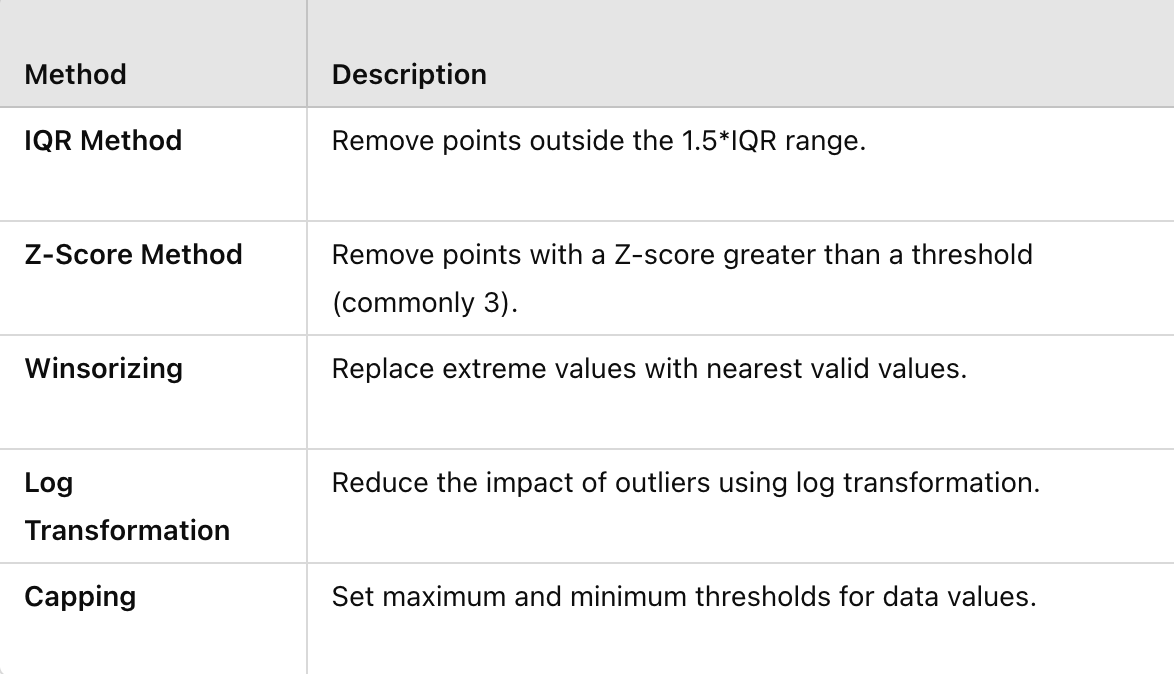

# 5. Data Transformation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


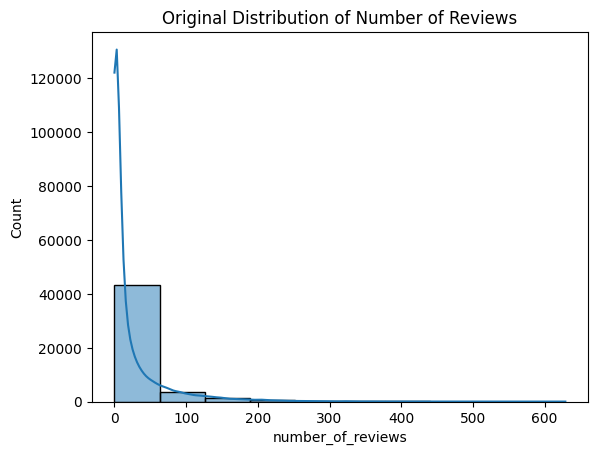

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


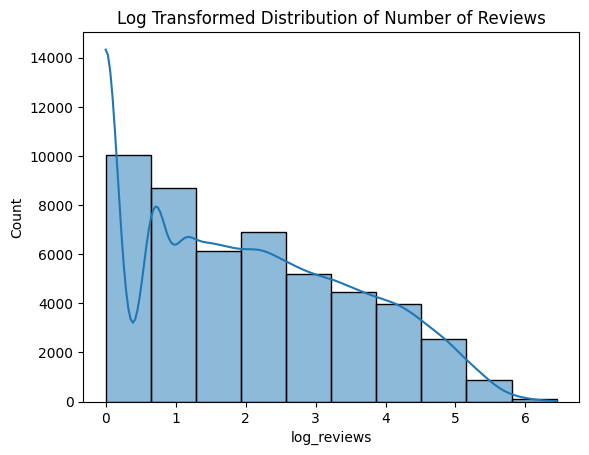

In [67]:
# Log Transformation - Log transformation is used to reduce skewness in the data by taking the logarithm of the values
# Used for exponential or right skewed distributions

# Original distribution
sns.histplot(df['number_of_reviews'], bins=10, kde=True)
plt.title('Original Distribution of Number of Reviews')
plt.show()

# Log transformation
df_temp['log_reviews'] = np.log1p(df_temp['number_of_reviews'])  # log1p is used to handle zero values

# Transformed distribution
sns.histplot(df['log_reviews'], bins=10, kde=True)
plt.title('Log Transformed Distribution of Number of Reviews')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


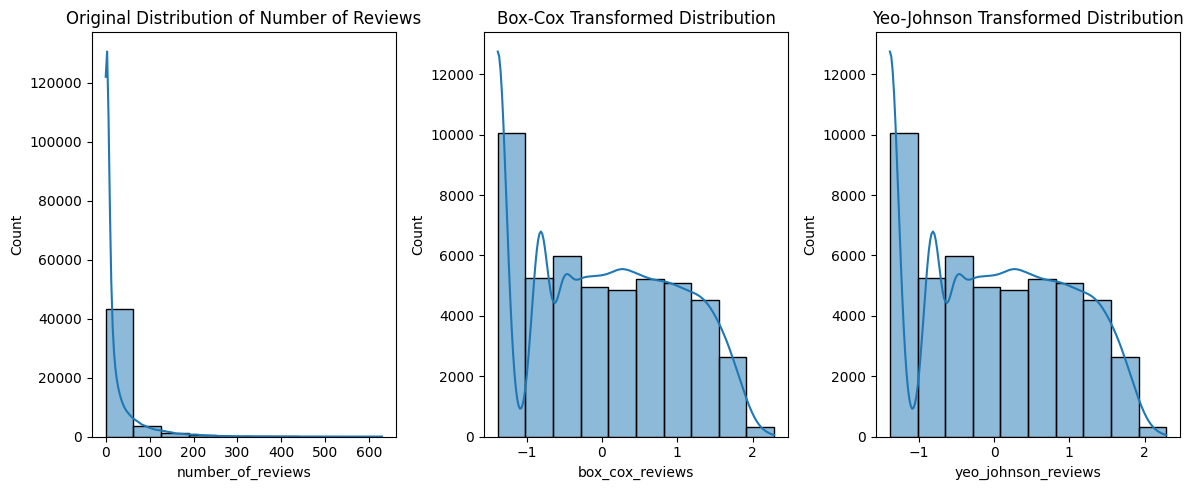

In [68]:
# Power transformation - aims to make the data more Gaussian
# Two methods - Box-cox, Yeo Johnson

from sklearn.preprocessing import PowerTransformer

df_temp['number_of_reviews_positive'] = df_temp['number_of_reviews'] + 1
# Box-Cox Transformation (only for positive values)
pt = PowerTransformer(method='box-cox')
df_temp['box_cox_reviews'] = pt.fit_transform(df_temp[['number_of_reviews_positive']])

# Yeo-Johnson Transformation (works for zero and negative values)
pt_yeo = PowerTransformer(method='yeo-johnson')
df_temp['yeo_johnson_reviews'] = pt_yeo.fit_transform(df_temp[['number_of_reviews']])

# Visualizing the transformations
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_temp['number_of_reviews'], bins=10, kde=True)
plt.title('Original Distribution of Number of Reviews')

plt.subplot(1, 3, 2)
sns.histplot(df_temp['box_cox_reviews'], bins=10, kde=True)
plt.title('Box-Cox Transformed Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df_temp['yeo_johnson_reviews'], bins=10, kde=True)
plt.title('Yeo-Johnson Transformed Distribution')

plt.tight_layout()
plt.show()

In [69]:
# Above methods Handles Skewness

# Skewness before transformation
skewness = df_temp['number_of_reviews'].skew()
print(f'Skewness before transformation: {skewness}')

# After Log Transformation
log_skewness = df_temp['log_reviews'].skew()
print(f'Skewness after log transformation: {log_skewness}')

# After Box-Cox Transformation
box_cox_skewness = df_temp['box_cox_reviews'].skew()
print(f'Skewness after Box-Cox transformation: {box_cox_skewness}')

# After Yeo-Johnson Transformation
yeo_johnson_skewness = df_temp['yeo_johnson_reviews'].skew()
print(f'Skewness after Yeo-Johnson transformation: {yeo_johnson_skewness}')

Skewness before transformation: 3.690634571595388
Skewness after log transformation: 0.36292368493774063
Skewness after Box-Cox transformation: 0.08253201864188912
Skewness after Yeo-Johnson transformation: 0.08253201381595869


In [70]:
# Why Data Transformation is Used
# Normalization: Many algorithms assume that data is normally distributed; transformations help achieve this.
# Variance Stabilization: Transformations can help stabilize variance across the range of data.
# Improve Model Performance: Algorithms, especially linear models, often perform better with transformed data.
# Handle Outliers: Transformation methods can mitigate the effect of outliers in the dataset.
# Enhancing Interpretability: Log transformations, for example, can make relationships easier to interpret.


# 6. Feature Engineering and Selection

Feature Engineering - Adding new cols, modifying existing cols (Removing outliers, Handling nulls and transforming the data)
* Handling categorical columns (Encoding)
* Handling Numeric columns (Scaling)
* Handling Outliers 
* Devire features, Interaction features
* Binning / Discretization
* Time-Based Features
* Polynomial Features
* Feature Selection (Statistical Methods)
* Dimensionality Reduction (PCA)

In [86]:
# Derive features using Transform

# transform() - creates new column but retains the shape of original df
# trasform assigns the agg result to each and every row in group (same group will have same agg)
# agg() - reduces the group to a single row with an aggregate result

df_temp = df[['number_of_reviews', 'host_id']].copy()
df_temp['total_reviews_per_host'] = df_temp.groupby('host_id')['number_of_reviews'].transform('sum')
df_temp.head(5)

,number_of_reviews,host_id,total_reviews_per_host
0,9,2787,105
1,45,2845,46
2,0,4632,0
3,270,4869,270
4,9,7192,9


In [93]:
# Rank using Transform

df_temp = df[['neighbourhood_group', 'price']].copy()
df_temp['price_rank'] = df_temp.groupby('neighbourhood_group')['price'].transform('rank')
df_temp.head(5)

,neighbourhood_group,price,price_rank
0,Brooklyn,149,14965.5
1,Manhattan,225,16466.5
2,Manhattan,150,11286.5
3,Brooklyn,89,9542.5
4,Manhattan,80,3833.0


In [87]:
# Interaction Features

df_temp = df[['price', 'availability_365', 'minimum_nights']].copy()
df_temp['price_availability_interaction'] = df_temp['price'] * df_temp['availability_365']
df_temp['price_min_night_interaction'] = df_temp['price'] * df_temp['minimum_nights']
df_temp.head(5)

,price,availability_365,minimum_nights,price_availability_interaction,price_min_night_interaction
0,149,365,1,54385,149
1,225,355,1,79875,225
2,150,365,3,54750,450
3,89,194,1,17266,89
4,80,0,10,0,800


In [89]:
# Binning - Transforms continuous numerical data into discrete intervals or "bins.
# Helpful in reducing the effects of noise, and handling skewness or outliers in the data
# Two types of binning - Equal width and equal frequency
# Equal Width: Bins have the same interval width.
# Equal Frequency: Bins have the same number of data points.

# Equal Width Binning:
bins = 5  
df_temp['price_equal_width_bin'] = pd.cut(df_temp['price'], bins=bins)

# Equal Frequency Binning:
df_temp['price_equal_freq_bin'] = pd.qcut(df['price'], q=4)

df_temp.head(3)

,price,availability_365,minimum_nights,price_availability_interaction,price_min_night_interaction,price_equal_width_bin,price_equal_freq_bin
0,149,365,1,54385,149,"(-10.0, 2000.0]","(106.0, 175.0]"
1,225,355,1,79875,225,"(-10.0, 2000.0]","(175.0, 10000.0]"
2,150,365,3,54750,450,"(-10.0, 2000.0]","(106.0, 175.0]"


In [91]:
price_equal_width_bin = df_temp['price_equal_width_bin'].value_counts()
print(price_equal_width_bin, "\n")

price_equal_freq_bin = df_temp['price_equal_freq_bin'].value_counts()
print(price_equal_freq_bin)

price_equal_width_bin
(-10.0, 2000.0]      48809
(2000.0, 4000.0]        54
(4000.0, 6000.0]        16
(6000.0, 8000.0]         9
(8000.0, 10000.0]        7
Name: count, dtype: int64 

price_equal_freq_bin
(-0.001, 69.0]      12371
(106.0, 175.0]      12246
(175.0, 10000.0]    12177
(69.0, 106.0]       12101
Name: count, dtype: int64


In [ ]:
# Why Binning
# Reduces Overfitting: Converting continuous variables into categories can simplify the model.
# Improves Interpretability: Categorical bins are often easier to interpret than raw numerical values.
# Handles Outliers

In [94]:
# Time Based Features - Create time-lagged features or cumulative metrics

df_temp = df[['last_review']].copy()
df_temp['last_review'] = pd.to_datetime(df_temp['last_review'])
df_temp['review_year'] = df_temp['last_review'].dt.year
df_temp['review_month'] = df_temp['last_review'].dt.month
df_temp.head(5)

,last_review,review_year,review_month
0,2018-10-19,2018.0,10.0
1,2019-05-21,2019.0,5.0
2,NaT,NaN,NaN
3,2019-07-05,2019.0,7.0
4,2018-11-19,2018.0,11.0


In [ ]:
# Feature Selection - Helps in identifying the most relevant features, improving model efficiency.
# Variance Threshold: Remove features with low variance.
# Correlation Matrix: Identify highly correlated features.
# Chi-Squared Test: Suitable for categorical variables

In [ ]:
# Dimensionality Reduction (PCA)
# Reduce feature space for better performance and visualization

In [97]:
# Polynomial Features - Adds power terms of existing features
# If there are two features a and b with degree 3, ploy function creates a*a a*b b*b
# Capture Non-Linearity

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['price', 'minimum_nights']])

df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['price', 'minimum_nights']))
df_poly.head(3)

,1,price,minimum_nights,price^2,price minimum_nights,minimum_nights^2
0,1.0,149.0,1.0,22201.0,149.0,1.0
1,1.0,225.0,1.0,50625.0,225.0,1.0
2,1.0,150.0,3.0,22500.0,450.0,9.0


# 7. Data Summarization and Visualization

In [71]:
# Pivot tables - summarizing and aggregatation of data

pivot_table = df.pivot_table(values='price', index='neighbourhood_group', columns='room_type', aggfunc='mean')
print("Pivot Table (Average Price):\n", pivot_table)

Pivot Table (Average Price):
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.788344    59.800000
Brooklyn                  178.327545     76.500099    50.527845
Manhattan                 249.239109    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444


In [73]:
# Cross tabulation - Relationship between two categorical variables - frequency distribution

cross_tab = pd.crosstab(df['neighbourhood_group'], df['room_type'])
print("Cross Tabulation:\n", cross_tab)

Cross Tabulation:
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            379           652           60
Brooklyn                        9559         10132          413
Manhattan                      13199          7982          480
Queens                          2096          3372          198
Staten Island                    176           188            9


In [79]:
# Group By 

grouped_df = df.groupby('neighbourhood_group').agg({
    'price': 'mean',
    'number_of_reviews': 'sum'
}).reset_index()
print("Grouped DataFrame:\n", grouped_df)

Grouped DataFrame:
   neighbourhood_group       price  number_of_reviews
0               Bronx   87.496792              28371
1            Brooklyn  124.383207             486574
2           Manhattan  196.875814             454569
3              Queens   99.517649             156950
4       Staten Island  114.812332              11541


/tmp/ipykernel_30/2568287216.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, ci=None)


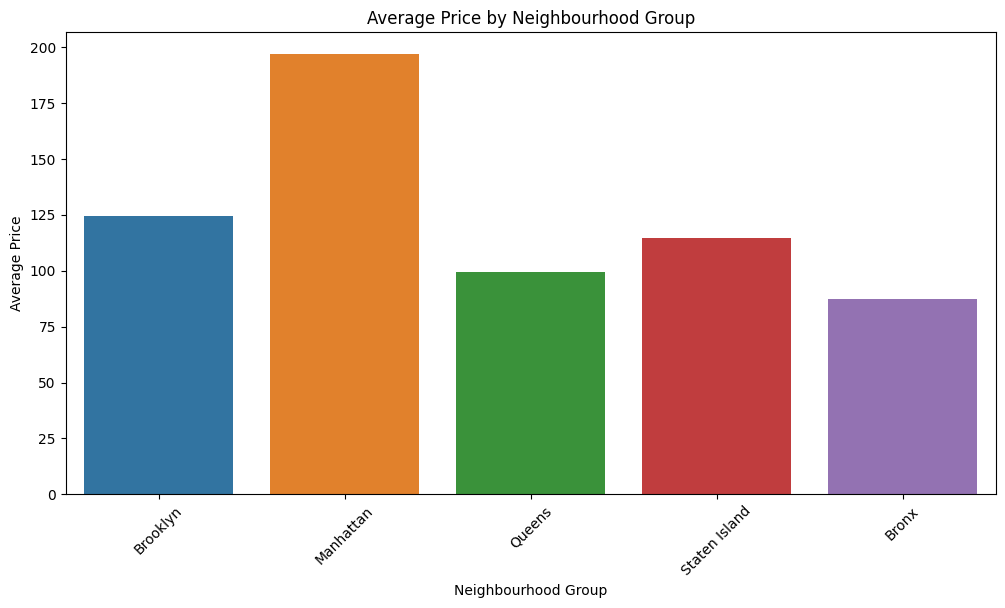

In [81]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean, ci=None)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [83]:
print('Pivot table - Manhattan has the highest average price for listings across all room types, while Brooklyn offers more affordable options for travelers.')
print('Cross-tabulation - Entire home/apt listings are popular in Manhattan compared to other neighbourhoods, where as private room is more popular in Brooklyn')
print('Group by - Brooklyn has the highest number of total reviews')
print('Bar Graph - Average prices vary significantly between neighbourhoods, Hence pricing strategies need to be adjusted based on location.')

Pivot table - Manhattan has the highest average price for listings across all room types, while Brooklyn offers more affordable options for travelers.
Cross-tabulation - Entire home/apt listings are popular in Manhattan compared to other neighbourhoods, where as private room is more popular in Brooklyn
Group by - Brooklyn has the highest number of total reviews
Bar Graph - Average prices vary significantly between neighbourhoods, Hence pricing strategies need to be adjusted based on location.


# 8. Questions 

In [100]:
# What can we learn about different hosts and areas?

host_listings = df.groupby('host_id').agg(total_listings=('id', 'count')).reset_index()
host_details = df[['host_id', 'host_name', 'neighbourhood_group', 'room_type']].drop_duplicates()
host_listings = host_listings.merge(host_details, on='host_id')

top_hosts = host_listings.sort_values(by='total_listings', ascending=False)
top_hosts.head(10)

,host_id,total_listings,host_name,neighbourhood_group,room_type
36150,219517861,327,Sonder (NYC),Manhattan,Entire home/apt
36151,219517861,327,Sonder (NYC),Manhattan,Private room
30667,107434423,232,Blueground,Manhattan,Entire home/apt
30668,107434423,232,Blueground,Brooklyn,Entire home/apt
20457,30283594,121,Kara,Manhattan,Entire home/apt
32405,137358866,103,Kazuya,Manhattan,Private room
32406,137358866,103,Kazuya,Queens,Private room
32407,137358866,103,Kazuya,Manhattan,Entire home/apt
32408,137358866,103,Kazuya,Brooklyn,Private room
15116,16098958,96,Jeremy & Laura,Manhattan,Private room


In [101]:
# Which hosts are the busiest and why?

host_reviews = df.groupby('host_id').agg(total_reviews=('number_of_reviews', 'sum')).reset_index()
host_reviews = host_reviews.merge(host_details, on='host_id')

busiest_hosts = host_reviews.sort_values(by='total_reviews', ascending=False)
busiest_hosts.head(10)

,host_id,total_reviews,host_name,neighbourhood_group,room_type
22268,37312959,2273,Maya,Queens,Private room
1118,344035,2205,Brooklyn& Breakfast -Len-,Brooklyn,Private room
19494,26432133,2017,Danielle,Queens,Private room
19495,26432133,2017,Danielle,Queens,Shared room
21818,35524316,1971,Yasu & Akiko,Manhattan,Shared room
21817,35524316,1971,Yasu & Akiko,Manhattan,Private room
22917,40176101,1818,Brady,Brooklyn,Private room
7721,4734398,1798,Jj,Manhattan,Private room
15409,16677326,1355,Alex And Zeena,Manhattan,Private room
9644,6885157,1346,Randy,Brooklyn,Entire home/apt
